In [5]:
#!pip install natsort
#!pip install seaborn
#!pip install glob2
#!pip install xarray

In [6]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [7]:
ls

Untitled.ipynb  pandas_analysis-Copy1.ipynb


## A

In [8]:
#rdir = '/workspace'
rdir = '../'

dat_files = natsort(glob2.glob(rdir + '/results/D/**/*.dat'))


len(dat_files)
#dat_files

14

In [9]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

In [10]:
columns3 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            
            'minVel','maxVel', 'minVxsurf', 'maxVxsurf', 'surfLength', 
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']


In [22]:
columns3 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            
            'minVel','maxVel', 'minVxsurf', 'maxVxsurf', 'surfLength', 
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

df = pd.read_csv('../results/D/2/results_modelD_2.dat', sep="\s*", header=None,  index_col=False)

df.columns = columns3

df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)



df2 = pd.read_csv('../results/D/11/results_modelD_11.dat', sep="\s*", header=None,  index_col=False)

df2.columns = columns3

df2['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
df2['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [23]:
df.columns

Index([u'areaintRock', u'tempintRock', u'rmsintRock', u'dwintRock',
       u'vdintRock', u'areaintLith', u'tempintLith', u'rmsintLith',
       u'dwintLith', u'vdintLith', u'areaintLower', u'tempintLower',
       u'rmsintLower', u'dwintLower', u'vdintLower', u'areaintHinge180',
       u'vdintHinge180', u'areaintHinge60', u'vdintHinge60',
       u'areaintInterface', u'vdintInterface', u'vdintInterface0', u'minVel',
       u'maxVel', u'minVxsurf', u'maxVxsurf', u'surfLength', u'rmsSurf',
       u'nuTop', u'nuBottom', u'plateness', u'subzone', u'lRidge', u'rRidge',
       u'realtime', u'rmsSurfScaled', u'realtimeScaled'],
      dtype='object')

(0, 20)

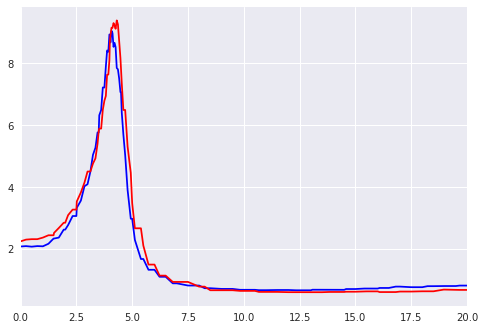

In [24]:
fig, ax = plt.subplots()

ax.plot(df['realtimeScaled'] , (df['rmsSurf']/df['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), c='b' )
ax.plot(df2['realtimeScaled'] , (df2['rmsSurf']/df2['surfLength']/(2900.*1e3/1e-6))*(1e2*3600*24*365), c='r' )

#ax.plot(df['realtimeScaled'] , (df['areaintLith']/df['areaintLower']), c='b' )
#ax.plot(df['realtimeScaled'] , (df['vdintLower']), c='b' )
#ax.plot(df['realtimeScaled'] , (df['vdintLith']), c='b' )


ax.set_xlim(0, 20)

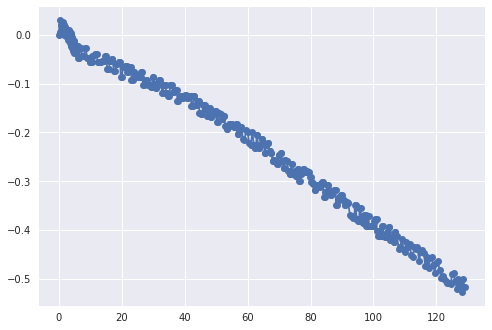

In [14]:
fig, ax = plt.subplots()
ax.plot(df['realtimeScaled'] , df['subzone'], marker='o' )
